### Demonstrate how to load and visualize input data using `torchvision` and `torchaudio`

Let us load the python modules first.

In [14]:
import torchaudio
import torchvision
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio

#### `torchvision` for loading input images

This is done through the `torchvision.io.read_image` function which returns a `torch.Tensor` of the image.

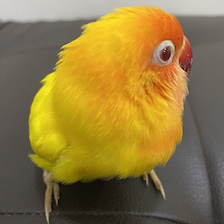

In [15]:
img = torchvision.io.read_image("data/birdie2.jpg")
img = torchvision.transforms.ToPILImage()(img)
display(img)

#### Visualize the transforms done before model prediction

In an earlier example, we used the `torchvision.transforms` module to apply a series of transformations to the input image before passing it to the model. Let us visualize the resulting image.

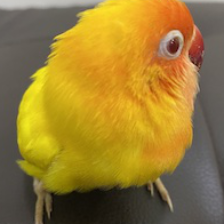

In [17]:
img = torchvision.io.read_image("data/birdie2.jpg")
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])

img = torchvision.transforms.Resize(256)(img)
img = torchvision.transforms.CenterCrop(224)(img).float()/255.
#img = normalize(img)
img = (img * 255).to(torch.uint8)
img = torchvision.transforms.ToPILImage()(img)
display(img)

#### `plot_waveform` function from `torchaudio`

This function accepts raw waveform and sampling rate to plot the waveform for visualization.

In [18]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)


### Using `torchaudio` to load audio and display waveform using `plot_waveform`

This is an alternative method to `librosa` for loading audio.

We will visualize the waveform using `plot_waveform`. We will also listen to the waveform.

AudioMetaData(sample_rate=22050, num_frames=81920, num_channels=1, bits_per_sample=16, encoding=PCM_S)


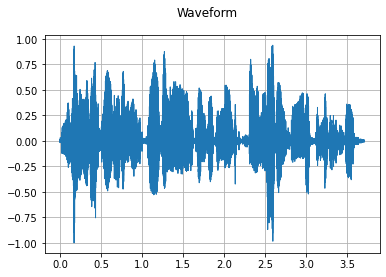

In [19]:
wav_path = "data/ljspeech.wav"
metadata = torchaudio.info(wav_path)
print(metadata)

wav, sample_rate = torchaudio.load(wav_path)
display(Audio(wav, rate=sample_rate))
plot_waveform(wav, sample_rate)
